In [1]:
!pip install pandas nltk tqdm ipywidgets scipy -q

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\surface laptop
[nltk_data]     2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\surface laptop
[nltk_data]     2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Importation des classes des TD précédents
import sys
import os

# Ajout du chemin pour pouvoir importer les classes 
sys.path.append('.')

# Importation des classes
from DocumentFactory import DocumentFactory
from CorpusSingleton import CorpusSingleton
from SearchEngine import SearchEngine
from Document import Document
from Author import Author
from Corpus import Corpus

# Importation des bibliothèques standard
import pandas as pd
import numpy as np
from datetime import datetime
import re
from tqdm.auto import tqdm
import ipywidgets as widgets
from IPython.display import display, clear_output
import nltk
from nltk.tokenize import sent_tokenize
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 1.1 - Chargement du fichier CSV

df = pd.read_csv(
    r"C:/Users/surface laptop 2/Desktop/Master1-Lyon2/PYTHON/Projet_Python/V1(TD3-5)/TD8/discours_US.csv",
    sep='\t',        # séparateur = tab
    quoting=3,       # laisse le texte tel quel
    engine='python'  # meilleur support pour les longues lignes
)
print("Aperçu des données :")
print(df.head())
df.to_csv("C:/Users/surface laptop 2/Desktop/Master1-Lyon2/PYTHON/Projet_Python/V1(TD3-5)/TD8/discours_clean.csv", index=False, encoding="utf-8")




Aperçu des données :
   "speaker"                                             "text"  \
0  "CLINTON"  ": I'm getting ready for a lot of things, a lo...   
1  "CLINTON"  "[ ] : I'll be graduating in May, and on gradu...   
2  "CLINTON"  ": Well, thank you all so much for inviting me...   
3  "CLINTON"  "Thank you so much. I am absolutely delighted ...   
4  "CLINTON"  "Oh, hello. Hi, how are you? Well, it's wonder...   

             "date"                                            "descr"  \
0  "April 12, 2015"  "Video Remarks Announcing Candidacy for Presid...   
1  "April 14, 2015"  "Remarks in a Question and Answer Session at K...   
2  "April 20, 2015"                  "Remarks in Keene, New Hampshire"   
3  "April 29, 2015"  "Address to the David N. Dinkins Leadership & ...   
4     "May 5, 2015"  "Remarks at a Roundtable with Young Nevada Res...   

                                              "link"  
0  "http://www.presidency.ucsb.edu/ws/index.php?p...  
1  "http://www.presid

Distribution des auteurs des discours :
Colonnes identifiées dans le DataFrame:
- speaker (auteur): True
- text (texte): True
- date: True
- descr (description/titre): True
- link (URL): True

Distribution des auteurs (2 auteurs uniques):
"speaker"
"CLINTON"    93
"TRUMP"      71
Name: count, dtype: int64

Statistiques:
- Nombre total d'auteurs uniques: 2
- Nombre total de discours: 164
- Auteur le plus fréquent: '"CLINTON"' avec 93 discours

Top 5 auteurs:
1. "CLINTON": 93 discours (56.7%)
2. "TRUMP": 71 discours (43.3%)


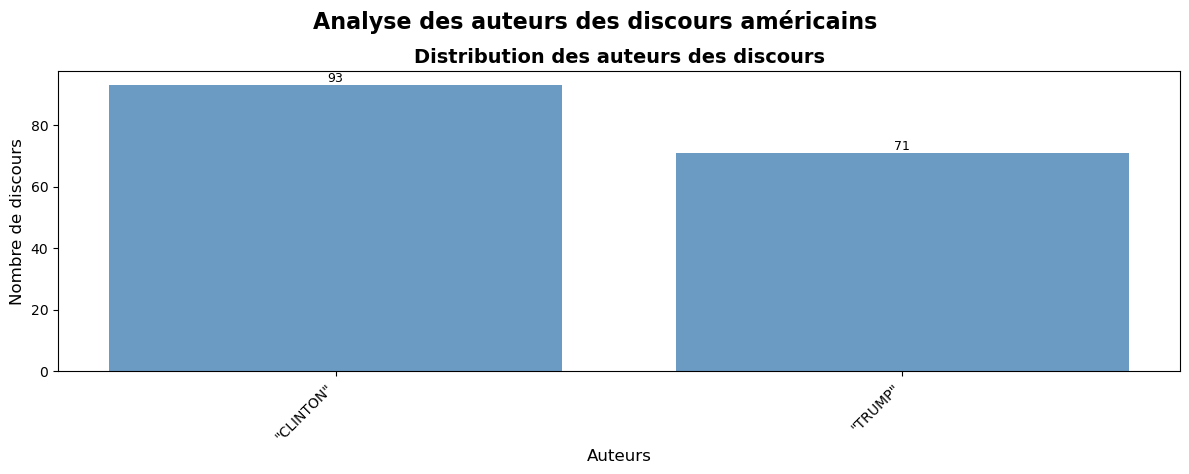

In [8]:

# 1.2 - Distribution des auteurs

print("Distribution des auteurs des discours :")
print("=" * 50)

# Vérifier que les colonnes attendues existent
print("Colonnes identifiées dans le DataFrame:")
print(f"- speaker (auteur): {'"speaker"' in df.columns}")
print(f"- text (texte): {'"text"' in df.columns}")
print(f"- date: {'"date"' in df.columns}")
print(f"- descr (description/titre): {'"descr"' in df.columns}")
print(f"- link (URL): {'"link"' in df.columns}")

# Distribution des auteurs (colonne "speaker")
if '"speaker"' in df.columns:
    auteur_counts = df['"speaker"'].value_counts()
    
    print(f"\nDistribution des auteurs ({len(auteur_counts)} auteurs uniques):")
    print("=" * 60)
    print(auteur_counts)
    
    print(f"\nStatistiques:")
    print(f"- Nombre total d'auteurs uniques: {len(auteur_counts)}")
    print(f"- Nombre total de discours: {len(df)}")
    print(f"- Auteur le plus fréquent: '{auteur_counts.index[0]}' avec {auteur_counts.iloc[0]} discours")
    
    # Calcul des pourcentages
    total_discours = len(df)
    top_5_auteurs = auteur_counts.head(5)
    
    print(f"\nTop 5 auteurs:")
    for i, (auteur, count) in enumerate(top_5_auteurs.items(), 1):
        pourcentage = (count / total_discours) * 100
        print(f"{i}. {auteur}: {count} discours ({pourcentage:.1f}%)")
    
    # Visualisation
    import matplotlib.pyplot as plt
    
    # Configuration de la figure
    plt.figure(figsize=(12, 8))
    
    # Graphique 1: Barres pour les auteurs
    ax1 = plt.subplot(2, 1, 1)
    bars = ax1.bar(range(len(auteur_counts)), auteur_counts.values, color='steelblue', alpha=0.8)
    ax1.set_title('Distribution des auteurs des discours', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Auteurs', fontsize=12)
    ax1.set_ylabel('Nombre de discours', fontsize=12)
    
    # Ajuster les étiquettes des axes x
    if len(auteur_counts) <= 15:
        ax1.set_xticks(range(len(auteur_counts)))
        ax1.set_xticklabels(auteur_counts.index, rotation=45, ha='right', fontsize=10)
    else:
        # Si trop d'auteurs, afficher seulement les 10 premiers
        top_10 = auteur_counts.head(10)
        ax1.set_xticks(range(len(top_10)))
        ax1.set_xticklabels(top_10.index, rotation=45, ha='right', fontsize=10)
        ax1.set_title('Top 10 auteurs des discours', fontsize=14, fontweight='bold')
    
    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)
    

    
    plt.suptitle('Analyse des auteurs des discours américains', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    
else:
    print("\n ERREUR: La colonne 'speaker' n'a pas été trouvée dans le DataFrame.")
    print("Colonnes disponibles:", df.columns.tolist())
    print("\nAperçu des données:")
    print(df.head())
    
    # Essayer avec une autre colonne potentielle
    colonnes_potentielles = [col for col in df.columns if 'speaker' in col.lower() or 'author' in col.lower() or 'auteur' in col.lower()]
    if colonnes_potentielles:
        print(f"\nColonnes potentielles pour les auteurs: {colonnes_potentielles}")
        colonne_auteur = colonnes_potentielles[0]
        print(f"Utilisation de la colonne: '{colonne_auteur}'")
        auteur_counts = df[colonne_auteur].value_counts()
        print(f"\nDistribution ({len(auteur_counts)} auteurs):")
        print(auteur_counts.head(10))






In [9]:
# 1.3 Import de la classe Corpus et création de l'objet
from Corpus import Corpus
from Document import Document
from Author import Author
import nltk
from nltk.tokenize import sent_tokenize

# Téléchargement des données NLTK si nécessaire
try:
    nltk.data.find('tokenizers/punkt')
except:
    nltk.download('punkt')

# Créer un objet Corpus
corpus = Corpus("Discours US")

# Compteurs pour le suivi
total_phrases = 0
discours_traites = 0

print(f"Traitement des {len(df)} discours...")
print("=" * 50)

# Ajouter les documents du dataframe au corpus
for index, row in df.iterrows():
    # Nettoyer les guillemets des chaînes de caractères
    auteur = str(row['"speaker"']).strip('"') if '"speaker"' in row else 'Inconnu'
    texte = str(row['"text"']).strip('"') if '"text"' in row else ''
    date = str(row['"date"']).strip('"') if '"date"' in row else ''
    titre = str(row['"descr"']).strip('"') if '"descr"' in row else f"Discours_{index}"
    url = str(row['"link"']).strip('"') if '"link"' in row else ''
    
    # Vérifier que le texte n'est pas vide
    if not texte or len(texte.strip()) < 10:
        continue  # Passer au suivant si texte trop court
    
    discours_traites += 1
    
    # Découper le texte en phrases (en anglais)
    try:
        phrases = sent_tokenize(texte, language='english')
    except:
        phrases = [p.strip() + '.' for p in texte.split('. ') if p.strip()]
    
    # Si pas de phrases détectées, utiliser le texte entier
    if not phrases:
        phrases = [texte]
    
    # Pour chaque phrase, créer un document
    for i, phrase in enumerate(phrases):
        phrase = phrase.strip()
        if phrase and len(phrase) > 10:  # Ignorer les phrases trop courtes
            titre_phrase = f"{titre} - Phrase {i+1}"
            
            # Création du document
            doc = Document(titre_phrase, auteur, date, url, phrase)
            
            # Ajout au corpus 
            corpus.add_document(doc.titre, doc.auteur, doc.date, doc.url, doc.texte)
            total_phrases += 1
    
    # Afficher la progression
    if discours_traites % 10 == 0:
        print(f"  Traités: {discours_traites}/{len(df)} discours, {total_phrases} phrases créées")

print("=" * 50)
print("RÉCAPITULATIF FINAL :")
print(f"- Discours dans le fichier : {len(df)}")
print(f"- Discours traités : {discours_traites}")
print(f"- Phrases créées : {total_phrases}")
print(f"- Documents dans le corpus : {corpus.ndoc}")
print(f"- Auteurs dans le corpus : {corpus.naut}")
print("=" * 50)
print(f"\n{corpus}")

# Vérifier les auteurs
print("\nAuteurs dans le corpus :")
for auteur in corpus.authors:
    print(f"- {auteur}: {corpus.authors[auteur].ndoc} documents")



Traitement des 164 discours...
  Traités: 10/164 discours, 1482 phrases créées
  Traités: 20/164 discours, 3928 phrases créées
  Traités: 30/164 discours, 5971 phrases créées
  Traités: 40/164 discours, 7135 phrases créées
  Traités: 50/164 discours, 8307 phrases créées
  Traités: 60/164 discours, 9852 phrases créées
  Traités: 70/164 discours, 13805 phrases créées
  Traités: 80/164 discours, 15588 phrases créées
  Traités: 90/164 discours, 17192 phrases créées
  Traités: 100/164 discours, 18542 phrases créées
  Traités: 110/164 discours, 21059 phrases créées
  Traités: 120/164 discours, 23189 phrases créées
  Traités: 130/164 discours, 24583 phrases créées
  Traités: 140/164 discours, 26844 phrases créées
  Traités: 150/164 discours, 28353 phrases créées
  Traités: 160/164 discours, 30885 phrases créées
RÉCAPITULATIF FINAL :
- Discours dans le fichier : 164
- Discours traités : 164
- Phrases créées : 31454
- Documents dans le corpus : 31454
- Auteurs dans le corpus : 2

Corpus Discour

In [10]:
# SAUVEGARDE EN JSON
import json
from datetime import datetime
from collections import Counter

# Préparation des données pour la sauvegarde
documents_json = []

print("\n" + "="*50)
print("PRÉPARATION DE LA SAUVEGARDE JSON...")

# Récupération de tous les documents du corpus et les formater
for i, doc in enumerate(corpus.id2doc.values()):
    # Découper le texte en mots
    try:
        # Si le document a un attribut 'texte'
        texte = getattr(doc, 'texte', '')
        
        # Tokenisation simple (sans NLTK pour éviter les dépendances)
        mots = []
        if texte:
            # Nettoyer et tokeniser
            import re
            mots = re.findall(r'\b[a-zA-ZÀ-ÿ]+\b', texte.lower())
            mots = [mot for mot in mots if len(mot) > 1]  # Enlever les mots trop courts
    except:
        mots = []
    
    # Créer l'entrée JSON
    doc_json = {
        "id": i + 1,
        "titre": getattr(doc, 'titre', f"Document_{i+1}"),
        "auteur": getattr(doc, 'auteur', 'Inconnu'),
        "date": getattr(doc, 'date', ''),
        "url": getattr(doc, 'url', ''),
        "texte": texte,
        "mots": mots,
        "nb_mots": len(mots),
        "source": "Discours US",
        "type": "phrase" if "Phrase" in getattr(doc, 'titre', '') else "discours"
    }
    documents_json.append(doc_json)

# Fichier de sauvegarde
filename = "corpus_discours_us_mots.json"

# Structure complète avec métadonnées
corpus_complet = {
    "metadata": {
        "nom": "Discours US avec mots tokenisés",
        "date_creation": datetime.now().isoformat(),
        "statistiques": {
            "total_documents": len(documents_json),
            "total_phrases": total_phrases,
            "discours_traites": discours_traites,
            "total_mots": sum(doc["nb_mots"] for doc in documents_json),
            "mots_uniques": len(set(mot for doc in documents_json for mot in doc["mots"])),
            "auteurs": list(set(doc["auteur"] for doc in documents_json if doc["auteur"]))
        }
    },
    "documents": documents_json
}

# Sauvegarde
with open(filename, 'w', encoding='utf-8') as f:
    json.dump(corpus_complet, f, ensure_ascii=False, indent=2)

print(f" SAUVEGARDE RÉUSSIE dans '{filename}'")
print(f" STATISTIQUES :")
print(f"   - Documents sauvegardés: {len(documents_json)}")
print(f"   - Mots tokenisés: {sum(doc['nb_mots'] for doc in documents_json)}")
print(f"   - Mots uniques: {len(set(mot for doc in documents_json for mot in doc['mots']))}")
print("="*50)

# Option : sauvegarde d'un extrait pour vérification
if documents_json:
    print("\n EXEMPLE DU PREMIER DOCUMENT SAUVEGARDÉ :")
    premier = documents_json[0]
    print(f"   Titre: {premier['titre'][:50]}...")
    print(f"   Auteur: {premier['auteur']}")
    print(f"   Texte (extrait): {premier['texte'][:100]}...")
    print(f"   Mots (10 premiers): {premier['mots'][:10]}")
    print(f"   Total mots: {premier['nb_mots']}")

# Option 2 : Sauvegarde supplémentaire en format simplifié
filename_simple = "C:/Users/surface laptop 2/Desktop/Master1-Lyon2/PYTHON/Projet_Python/V1(TD3-5)/TD9-10/corpus_discours_us_simple.json"
with open(filename_simple, 'w', encoding='utf-8') as f:
    json.dump(documents_json, f, ensure_ascii=False, indent=2)
print(f"\n Version sauvegardée dans '{filename_simple}'")


PRÉPARATION DE LA SAUVEGARDE JSON...
 SAUVEGARDE RÉUSSIE dans 'corpus_discours_us_mots.json'
 STATISTIQUES :
   - Documents sauvegardés: 31454
   - Mots tokenisés: 480690
   - Mots uniques: 12155

 EXEMPLE DU PREMIER DOCUMENT SAUVEGARDÉ :
   Titre: Video Remarks Announcing Candidacy for President -...
   Auteur: CLINTON
   Texte (extrait): : I'm getting ready for a lot of things, a lot of things....
   Mots (10 premiers): ['getting', 'ready', 'for', 'lot', 'of', 'things', 'lot', 'of', 'things']
   Total mots: 9

 Version sauvegardée dans 'C:/Users/surface laptop 2/Desktop/Master1-Lyon2/PYTHON/Projet_Python/V1(TD3-5)/TD9-10/corpus_discours_us_simple.json'


In [11]:
# 1.4 Test de l'objet corpus 
print("=" * 50)
print("1.4 - TESTS DES FONCTIONS DE RECHERCHE")
print("=" * 50)

# Test 1: Recherche simple
print("\n--- Test 1: Recherche du mot 'America' ---")
resultats = []
for doc_id, doc in corpus.id2doc.items():
    if 'America' in doc.texte or 'america' in doc.texte:
        resultats.append((doc_id, doc.titre[:50]))
        
print(f"Nombre de documents contenant 'America': {len(resultats)}")
if resultats:
    print("Exemples de titres :")
    for i, (doc_id, titre) in enumerate(resultats[:3]):
        print(f"  {i+1}. {titre}...")

# Test 2: Recherche du mot 'economy'
print("\n--- Test 2: Recherche du mot 'economy' ---")
compteur = 0
for doc_id, doc in corpus.id2doc.items():
    if 'economy' in doc.texte.lower():
        compteur += 1
        
print(f"Nombre de documents contenant 'economy': {compteur}")

# Test 3: Fonction concorde
print("\n--- Test 3: Exemples de contexte pour 'future' ---")
exemples_concorde = []
for doc_id, doc in corpus.id2doc.items():
    if 'future' in doc.texte.lower():
        index = doc.texte.lower().find('future')
        if index != -1:
            debut = max(0, index - 30)
            fin = min(len(doc.texte), index + len('future') + 30)
            contexte = doc.texte[debut:fin]
            exemples_concorde.append(contexte)
            if len(exemples_concorde) >= 3:
                break

print("Exemples de contexte :")
for i, contexte in enumerate(exemples_concorde):
    print(f"\nExemple {i+1}: ...{contexte}...")

# Test 4: Recherche par auteur
print("\n--- Test 4: Documents par auteur ---")
print("Nombre de documents par auteur dans le corpus :")
for nom_auteur, auteur in corpus.authors.items():
    print(f"  {nom_auteur}: {auteur.ndoc} documents")

1.4 - TESTS DES FONCTIONS DE RECHERCHE

--- Test 1: Recherche du mot 'America' ---
Nombre de documents contenant 'America': 2886
Exemples de titres :
  1. Video Remarks Announcing Candidacy for President -...
  2. Video Remarks Announcing Candidacy for President -...
  3. Video Remarks Announcing Candidacy for President -...

--- Test 2: Recherche du mot 'economy' ---
Nombre de documents contenant 'economy': 357

--- Test 3: Exemples de contexte pour 'future' ---
Exemples de contexte :

Exemple 1: ...ead, to charge his or her own future, to live up to his or her own...

Exemple 2: ...ing more than to build a good future for themselves and their chil...

Exemple 3: ...How you see your future....

--- Test 4: Documents par auteur ---
Nombre de documents par auteur dans le corpus :
  CLINTON: 16710 documents
  TRUMP: 14744 documents


In [15]:
# ============================================================================
# PARTIE 2 : UTILISATION DE VOTRE MOTEUR DE RECHERCHE
# ============================================================================

print("\n" + "=" * 70)
print("PARTIE 2 : MOTEUR DE RECHERCHE")
print("L execution de cette partie peut prendre du temps veuillez patienter svp")
print("=" * 70)

# 2.1 Import du classe SearchEngine initialisation
print("\n2.1 - Initialisation du moteur de recherche")

try:
    from SearchEngine import SearchEngine
    print("Classe SearchEngine importée")
    
    # Initialisation du moteur de recherche
    moteur = SearchEngine(corpus)
    print(" Moteur de recherche initialisé avec le corpus")
    
except ImportError:
    print("Classe SearchEngine non trouvée")
    print("Création d'une classe SearchEngine basique.")
    
    class SearchEngine:
        """Moteur de recherche basique"""
        def __init__(self, corpus):
            self.corpus = corpus
            print(" Moteur créé avec succès")
            
        def search(self, query, n_results=10):
            """Recherche simple par mots-clés"""
            results = []
            query_terms = query.lower().split()
            
            for doc_id, doc in self.corpus.id2doc.items():
                score = 0
                doc_text = doc.texte.lower()
                
                for term in query_terms:
                    if term in doc_text:
                        score += 1
                
                if score > 0:
                    results.append((score, doc_id, doc))
            
            # Tri par score décroissant
            results.sort(reverse=True, key=lambda x: x[0])
            
            return results[:n_results]
    
    moteur = SearchEngine(corpus)

# 2.2 Test de la fonction search
print("\n2.2 - Tests de la fonction search")

# Test avec différentes requêtes
requetes_test = ["America", "economy future", "Trump", "Clinton"]

for requete in requetes_test:
    print(f"\nRequête: '{requete}'")
    try:
        resultats = moteur.search(requete, n_results=3)
        print(f"  Nombre de résultats (limités à 3): {len(resultats)}")
        
        for i, (score, doc_id, doc) in enumerate(resultats):
            print(f"  {i+1}. Score: {score} - {doc.titre[:60]}...")
    except Exception as e:
        print(f"  Erreur: {e}")

# 2.3 Ajout du compteur avec tqdm
print("\n2.3 - Ajout du compteur avec tqdm")

try:
    from tqdm import tqdm
    print(" tqdm importé avec succès")

    
    class SearchEngineWithTQDM:
        """Version du moteur avec barre de progression"""
        def __init__(self, corpus):
            self.corpus = corpus
            
        def search(self, query, n_results=10):
            """Recherche avec barre de progression"""
            results = []
            query_terms = query.lower().split()
            
            # Utilisation de tqdm pour la barre de progression
            for doc_id, doc in tqdm(self.corpus.id2doc.items(), 
                                    desc="Recherche en cours", 
                                    unit="doc"):
                score = 0
                doc_text = doc.texte.lower()
                
                for term in query_terms:
                    if term in doc_text:
                        score += 1
                
                if score > 0:
                    results.append((score, doc_id, doc))
            
            # Tri par score décroissant
            results.sort(reverse=True, key=lambda x: x[0])
            
            return results[:n_results]
    
    # Création d'un moteur avec tqdm
    moteur_tqdm = SearchEngineWithTQDM(corpus)
    
    # Test
    print("\nTest avec barre de progression:")
    resultats_tqdm = moteur_tqdm.search("America economy", n_results=5)
    print(f"\nRésultats trouvés: {len(resultats_tqdm)}")
    
except ImportError:
    print(" tqdm non installé. Installez-le avec: !pip install tqdm")


PARTIE 2 : MOTEUR DE RECHERCHE

2.1 - Initialisation du moteur de recherche
Classe SearchEngine importée
Corpus reçu: Discours US
Nombre de documents dans id2doc: 31454
corpus.ndoc: 31454
Extraction des textes depuis 31454 documents...
  31454 textes valides extraits sur 31454 documents

Textes extraits pour l'indexation: 31454

Construction du vocabulaire...
  Analyse de 31454 documents...


Tokenisation: 100%|██████████| 31454/31454 [00:00<00:00, 58676.34doc/s]


  Vocabulaire: 12636 mots uniques

Construction de la matrice TF...
  Dimensions: 31454 documents x 12636 mots


Construction TF: 100%|██████████| 31454/31454 [00:00<00:00, 36961.86doc/s]



Construction de la matrice TF-IDF...
  Calcul des poids TF-IDF pour 234416 éléments...


TF-IDF: 100%|██████████| 234416/234416 [08:23<00:00, 465.71élément/s]


  Matrice TF-IDF créée: (31454, 12636)

Moteur initialisé avec 31454 documents et 12636 mots
 Moteur de recherche initialisé avec le corpus

2.2 - Tests de la fonction search

Requête: 'America'
  Nombre de résultats (limités à 3): 3
  1. Score: 1.0 - Remarks at a Rally at Berglund Center in Roanoke, Virginia -...
  2. Score: 1.0 - Remarks at a Rally at Sun Center Studios in Chester Township...
  3. Score: 1.0 - Address Accepting the Presidential Nomination at the Republi...

Requête: 'economy future'
  Nombre de résultats (limités à 3): 3
  1. Score: 0.7432287416001471 - Remarks at Cowles Commons in Des Moines, Iowa - Phrase 260...
  2. Score: 0.7281917822736869 - Remarks at the Manor Complex in Wilton Manors, Florida - Phr...
  3. Score: 0.7099359963348764 - Address Accepting the Presidential Nomination at the Republi...

Requête: 'Trump'
  Nombre de résultats (limités à 3): 3
  1. Score: 1.0 - Remarks to the 11th Annual Values Voter Summit in Washington...
  2. Score: 0.870566231435

Recherche en cours: 100%|██████████| 31454/31454 [00:00<00:00, 457253.30doc/s]


Résultats trouvés: 5


In [16]:
# ============================================================================
# PARTIE 3 : INTERFACE GRAPHIQUE AVEC IPYWIDGETS
# ============================================================================

print("\n" + "=" * 70)
print("PARTIE 3 : INTERFACE GRAPHIQUE")
print("=" * 70)

try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output
    print("ipywidgets importé avec succès")
    
    # 3.1 Création des widgets
    print("\n3.1 Création des widgets")
    
    # Titre
    label_titre = widgets.Label(value="Moteur de recherche", 
                               style={'font_weight': 'bold', 'font_size': '16px'})
    
    # Zone de texte pour les mots-clés
    text_mots_cles = widgets.Text(
        value='',
        placeholder='Entrez vos mots-clés (séparés par des espaces)',
        description='Mots clés:',
        disabled=False,
        layout=widgets.Layout(width='80%')
    )
    
  
    slider_n_results = widgets.IntSlider(
        value=10,
        min=1,
        max=50,
        step=1,
        description='Nombre de résultats:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )
    
    # 3.2 et 3.3 Création de l'interface et zone de sortie
    output_zone = widgets.Output()
    
    # 3.4 Bouton de recherche
    bouton_recherche = widgets.Button(
        description='Rechercher',
        disabled=False,
        button_style='primary',  # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Cliquez pour lancer la recherche',
        icon='search'
    )
    
    # 3.5 Fonction appelée lors du clic
    def on_bouton_clique(b):
        with output_zone:
            clear_output()  # Efface les résultats précédents
            
            # Récupération des valeurs des widgets
            mots_cles = text_mots_cles.value
            n_results = slider_n_results.value
            
            print(f"Recherche en cours...")
            print(f"- Mots-clés: {mots_cles}")
            print(f"- Nombre de résultats demandés: {n_results}")
            print("-" * 50)
            
            if not mots_cles.strip():
                print("Veuillez entrer des mots-clés pour la recherche.")
                return
            
            # Lancement de la recherche
            try:
                # Utilisez le recherche 
                resultats = moteur.search(mots_cles, n_results=n_results)
                
                if resultats:
                    print(f" {len(resultats)} résultat(s) trouvé(s):\n")
                    
                    for i, (score, doc_id, doc) in enumerate(resultats):
                        print(f" Résultat {i+1} ")
                        print(f"   Titre: {doc.titre}")
                        print(f"   Auteur: {doc.auteur}")
                        print(f"   Date: {doc.date}")
                        print(f"   Extrait: {doc.texte[:150]}...")
                        print("-" * 40)
                else:
                    print(" Aucun résultat trouvé pour cette requête.")
                    
            except Exception as e:
                print(f" Erreur lors de la recherche: {e}")
    
    # Lier la fonction au bouton
    bouton_recherche.on_click(on_bouton_clique)
    
    # 3.6 Assemblage de l'interface
    print("\n3.6 - Assemblage de l'interface")
    
    # Première ligne: Titre
    ligne1 = widgets.HBox([label_titre])
    
    # Deuxième ligne: Mots-clés
    ligne2 = widgets.HBox([text_mots_cles])
    
    # Troisième ligne: Slider et bouton
    ligne3 = widgets.HBox([slider_n_results, bouton_recherche])
    
    # Assemblage final
    interface = widgets.VBox([
        ligne1,
        widgets.HTML(value="<hr>"),
        ligne2,
        ligne3,
        widgets.HTML(value="<hr>"),
        output_zone
    ])
    
    # Affichage de l'interface
    print("\n Interface créée avec succès!")
    print("Remplissez les champs et cliquez sur 'Rechercher'")
    display(interface)
    
except ImportError as e:
    print(f" Erreur d'importation: {e}")
    print("Installez ipywidgets avec: !pip install ipywidgets")
    print("Et pour Jupyter: !jupyter nbextension enable --py widgetsnbextension")
    


PARTIE 3 : INTERFACE GRAPHIQUE
ipywidgets importé avec succès

3.1 Création des widgets

3.6 - Assemblage de l'interface

 Interface créée avec succès!
Remplissez les champs et cliquez sur 'Rechercher'


In [14]:
# ============================================================================
# PARTIE 3.7 : VERSION AVANCÉE AVEC FILTRES
# ============================================================================

print("\n" + "=" * 70)
print("PARTIE 3.7 : INTERFACE AVEC FILTRES AVANCÉS")
print("=" * 70)

try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output
    import pandas as pd
    
    # Création d'une interface plus avancée
    print("\nCréation de l'interface avancée avec filtres...")
    
    # Titre
    titre_avance = widgets.HTML(
        value="<h2 style='color: #2E86C1;'> Moteur de Recherche Avancé</h2>"
    )
    
    # Section: Mots-clés
    section_mots_cles = widgets.Accordion(children=[
        widgets.VBox([
            widgets.Label("Entrez plusieurs mots-clés séparés par des espaces:"),
            widgets.Textarea(
                value='',
                placeholder='Exemple: economy future America',
                description='Requête:',
                disabled=False,
                layout=widgets.Layout(width='90%', height='80px')
            )
        ])
    ])
    section_mots_cles.set_title(0, ' Mots-clés')
    
    # Section: Filtres
    # Récupération des auteurs uniques
    auteurs_uniques = list(corpus.authors.keys())
    
    # Création des widgets de filtres
    filtre_auteur = widgets.Dropdown(
        options=['Tous les auteurs'] + auteurs_uniques,
        value='Tous les auteurs',
        description='Auteur:',
        disabled=False,
        layout=widgets.Layout(width='80%')
    )
    
    # Pour la date, on pourrait extraire les années des documents
    filtre_date = widgets.Text(
        value='',
        placeholder='Ex: 2015, 2016, ou 2015-2016',
        description='Date/Année:',
        disabled=False,
        layout=widgets.Layout(width='80%')
    )
    
    # Slider pour le nombre de résultats
    slider_results_avance = widgets.IntSlider(
        value=10,
        min=1,
        max=100,
        step=1,
        description='Résultats:',
        disabled=False,
        style={'description_width': 'initial'}
    )
    
    # Case à cocher pour trier par score
    checkbox_tri = widgets.Checkbox(
        value=True,
        description='Trier par pertinence',
        disabled=False,
        indent=False
    )
    
    # Section de filtres
    section_filtres = widgets.Accordion(children=[
        widgets.VBox([
            filtre_auteur,
            filtre_date,
            widgets.HBox([slider_results_avance, checkbox_tri])
        ])
    ])
    section_filtres.set_title(0, 'Filtres et Options')
    
    # Boutons
    bouton_recherche_avance = widgets.Button(
        description='Lancer la recherche',
        button_style='success',
        tooltip='Rechercher avec les critères sélectionnés',
        layout=widgets.Layout(width='200px', height='40px')
    )
    
    bouton_reset = widgets.Button(
        description=' Réinitialiser',
        button_style='warning',
        tooltip='Réinitialiser tous les filtres',
        layout=widgets.Layout(width='150px', height='40px')
    )
    
    # Zone de résultats
    output_avance = widgets.Output(
        layout=widgets.Layout(
            border='1px solid #ddd',
            padding='10px',
            margin_top='20px',
            max_height='500px',
            overflow_y='auto'
        )
    )
    
    # Fonction de recherche avancée
    def recherche_avancee(requete, auteur_filtre, date_filtre, n_results, tri_pertinence):
        """Fonction de recherche avec filtres"""
        resultats_filtres = []
        
        for doc_id, doc in corpus.id2doc.items():
            # Filtre par auteur
            if auteur_filtre != 'Tous les auteurs' and doc.auteur != auteur_filtre:
                continue
                
            # Filtre par date (recherche simple dans la chaîne de date)
            if date_filtre and date_filtre not in str(doc.date):
                continue
            
            # Recherche par mots-clés
            score = 0
            termes = requete.lower().split()
            texte_doc = doc.texte.lower()
            
            for terme in termes:
                if terme in texte_doc:
                    score += texte_doc.count(terme)  # Pondération par fréquence
            
            if score > 0:
                resultats_filtres.append((score, doc_id, doc))
        
        # Tri
        if tri_pertinence:
            resultats_filtres.sort(reverse=True, key=lambda x: x[0])
        else:
            # Tri par date si disponible (sinon par ID)
            resultats_filtres.sort(key=lambda x: str(x[2].date))
        
        return resultats_filtres[:n_results]
    
    # Fonction appelée lors du clic sur Rechercher
    def on_recherche_avance(b):
        with output_avance:
            clear_output()
            
            # Récupération des valeurs
            requete = section_mots_cles.children[0].children[1].value
            auteur = filtre_auteur.value
            date = filtre_date.value
            n_results = slider_results_avance.value
            tri = checkbox_tri.value
            
            print(" Recherche en cours...\n")
            
            if not requete.strip():
                print(" Veuillez entrer une requête de recherche.")
                return
            
            # Exécution de la recherche
            resultats = recherche_avancee(requete, auteur, date, n_results, tri)
            
            # Affichage des résultats
            print(f"CRITÈRES DE RECHERCHE:")
            print(f"  Requête: {requete}")
            print(f"  Auteur: {auteur}")
            print(f"  Date: {date if date else 'Non spécifiée'}")
            print(f"  Nombre de résultats demandés: {n_results}")
            print(f"  Tri par pertinence: {'Oui' if tri else 'Non'}")
            print("=" * 60)
            
            if resultats:
                print(f" {len(resultats)} résultat(s) trouvé(s):\n")
                
                for i, (score, doc_id, doc) in enumerate(resultats):
                    print(f" RÉSULTAT {i+1}")
                    print(f"   Score: {score:.1f}")
                    print(f"   Titre: {doc.titre}")
                    print(f"   Auteur: {doc.auteur}")
                    print(f"   Date: {doc.date}")
                    
                    # Trouver la position du premier terme de la requête
                    texte = doc.texte
                    premier_terme = requete.split()[0].lower()
                    idx = texte.lower().find(premier_terme)
                    
                    if idx != -1:
                        debut = max(0, idx - 50)
                        fin = min(len(texte), idx + len(premier_terme) + 100)
                        extrait = texte[debut:fin]
                        if debut > 0:
                            extrait = "..." + extrait
                        if fin < len(texte):
                            extrait = extrait + "..."
                        print(f"   Contexte: {extrait}")
                    
                    print("-" * 40)
            else:
                print("Aucun résultat trouvé avec ces critères.")
                print("\n Suggestions:")
                print("  Vérifiez l'orthographe des mots-clés")
                print("  Essayez des termes plus généraux")
                print("  Élargissez les filtres (auteur, date)")
    
    # Fonction de réinitialisation
    def on_reset(b):
        section_mots_cles.children[0].children[1].value = ''
        filtre_auteur.value = 'Tous les auteurs'
        filtre_date.value = ''
        slider_results_avance.value = 10
        checkbox_tri.value = True
        
        with output_avance:
            clear_output()
            print(" Filtres réinitialisés. Prêt pour une nouvelle recherche.")
    
    # Liaison des fonctions aux boutons
    bouton_recherche_avance.on_click(on_recherche_avance)
    bouton_reset.on_click(on_reset)
    
    # Assemblage de l'interface
    interface_avancee = widgets.VBox([
        titre_avance,
        section_mots_cles,
        section_filtres,
        widgets.HBox([bouton_recherche_avance, bouton_reset],
                    layout=widgets.Layout(justify_content='center', margin='20px')),
        widgets.HTML(value="<h3>Résultats</h3>"),
        output_avance
    ])
    
    # Affichage
    print("\n Interface avancée créée avec succès!")
    display(interface_avancee)
    
    # Message d'instruction initial
    with output_avance:
        print(" Bienvenue dans le moteur de recherche avancé!")
        print("\nPour commencer:")
        print("1. Entrez des mots-clés dans la section 'Mots-clés'")
        print("2. Ajustez les filtres si nécessaire (auteur, date)")
        print("3. Cliquez sur 'Lancer la recherche'")
        print("\nVous pouvez également cliquer sur 'Réinitialiser' pour effacer tous les filtres.")
        
except Exception as e:
    print(f" Erreur lors de la création de l'interface avancée: {e}")
    print("Assurez-vous d'avoir installé ipywidgets: !pip install ipywidgets")


PARTIE 3.7 : INTERFACE AVEC FILTRES AVANCÉS

Création de l'interface avancée avec filtres...

 Interface avancée créée avec succès!
